# Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



# Import the dataset

In [2]:
data = pd.read_csv("breast-cancer-wisconsin.csv")
data.head(12)

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Shape of the dataset

In [3]:
data.shape

(699, 11)

the dataset does not contain any missing values

# Verifying duplicate in the dataset

In [4]:
duplicates = data[data.duplicated()]
print(duplicates)

      Sample  F1  F2  F3  F4  F5  F6  F7  F8  F9  Class
208  1218860   1   1   1   1   1   1   3   1   1      2
253  1100524   6  10  10   2   8  10   7   3   3      4
254  1116116   9  10  10   1  10   8   3   3   1      4
258  1198641   3   1   1   1   2   1   3   1   1      2
272   320675   3   3   5   2   3  10   7   1   1      4
338   704097   1   1   1   1   1   1   2   1   1      2
561  1321942   5   1   1   1   2   1   3   1   1      2
684   466906   1   1   1   1   2   1   1   1   1      2


we have 8 identical copies

# Removing duplicates by considering only the first occurence

In [5]:
clean_data = data.drop_duplicates()
print(clean_data)

      Sample  F1  F2  F3  F4  F5  F6  F7  F8  F9  Class
0    1000025   5   1   1   1   2   1   3   1   1      2
1    1002945   5   4   4   5   7  10   3   2   1      2
2    1015425   3   1   1   1   2   2   3   1   1      2
3    1016277   6   8   8   1   3   4   3   7   1      2
4    1017023   4   1   1   3   2   1   3   1   1      2
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
694   776715   3   1   1   1   3   2   1   1   1      2
695   841769   2   1   1   1   2   1   1   1   1      2
696   888820   5  10  10   3   7   3   8  10   2      4
697   897471   4   8   6   4   3   4  10   6   1      4
698   897471   4   8   8   5   4   5  10   4   1      4

[691 rows x 11 columns]


cleaned data

# check the data Types

In [6]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sample  691 non-null    int64 
 1   F1      691 non-null    int64 
 2   F2      691 non-null    int64 
 3   F3      691 non-null    int64 
 4   F4      691 non-null    int64 
 5   F5      691 non-null    int64 
 6   F6      691 non-null    object
 7   F7      691 non-null    int64 
 8   F8      691 non-null    int64 
 9   F9      691 non-null    int64 
 10  Class   691 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.8+ KB


In [7]:
clean_data['F6'] = pd.to_numeric(clean_data['F6'], errors='coerce')

# calculating umber of unique values in each column

In [8]:
clean_data.nunique()

Sample    645
F1         10
F2         10
F3         10
F4         10
F5         10
F6         10
F7         10
F8         10
F9          9
Class       2
dtype: int64

# 1 . Examine the dataset statical properties, summarizing individual columns with metrics like minimum, maximum, and mean values

In [9]:
clean_data.describe()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
count,6.910000e+02,691.000000,691.000000,691.000000,691.000000,691.000000,675.000000,691.000000,691.000000,691.000000,691.000000
mean,1.073333e+06,4.426918,3.130246,3.201158,2.824891,3.211288,3.537778,3.435601,2.882779,1.593343,2.688857
std,6.192953e+05,2.815861,3.041328,2.959886,2.866552,2.199852,3.637871,2.442345,3.066298,1.723129,0.951051
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.725490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238437e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# 2. Identifying missing values

In [10]:
clean_data.isnull().sum()

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

# 3. Replace the missing values in the column with the "Mean" of the column

In [11]:
clean_data['F6'].fillna(clean_data['F6'].mean(), inplace=True)


In [12]:

clean_data['F6'] = clean_data['F6'].round().astype(int)


In [13]:
X = clean_data.drop(columns=['Class'], axis=1)
y = clean_data['Class']

# Min-Max Scaling(Normalization)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

# Dividing data in to training, testing, and validation sets.

In [31]:
from sklearn.model_selection import train_test_split 
X_train,X_remaining,y_train,y_Remaining = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [32]:
X_validation,X_test,y_validation,y_test = train_test_split(X_remaining,y_Remaining,test_size = 0.5,random_state = 42 )

In [33]:
print("Train set size :" , X_train.shape)
print("Validation set size :" , X_validation.shape)
print("Test set size :" , X_test.shape)


Train set size : (483, 10)
Validation set size : (104, 10)
Test set size : (104, 10)


# 4.Displaying the frequency table of “Class” vs. F6

In [34]:
frequency_table = pd.crosstab(index=clean_data['Class'],columns=clean_data['F6'])

In [35]:
frequency_table.head()

F6,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
2,382,21,14,20,10,0,1,2,0,3
4,15,9,14,15,20,4,7,18,9,127


# 5. Displaying the scatter plot of F1 to F6, one pair at a time

In [20]:
columns_to_plot = ['F1','F2','F3','F4','F5','F6']

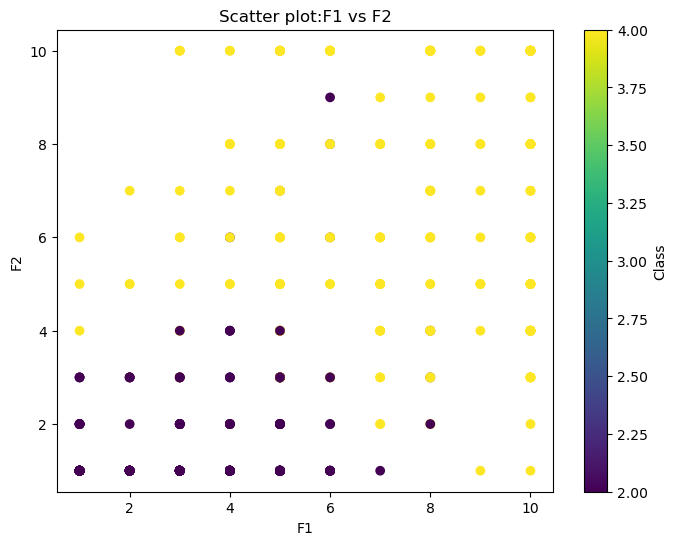

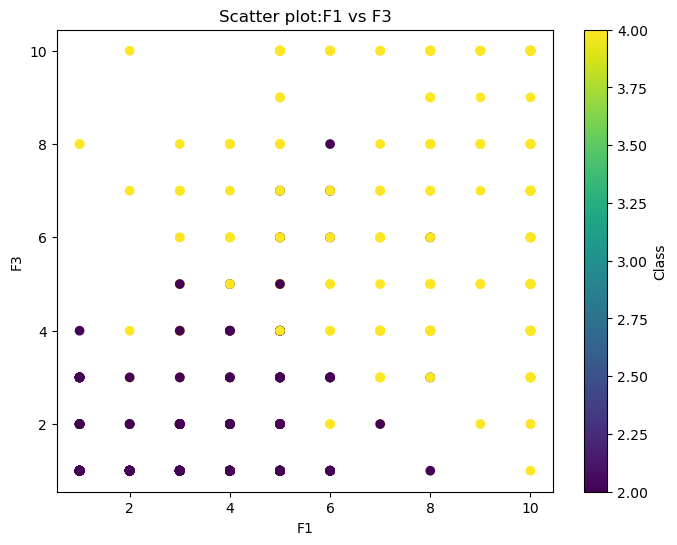

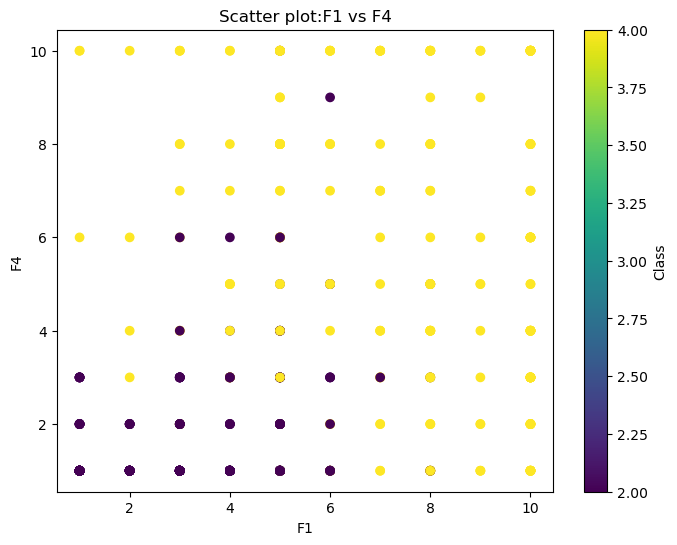

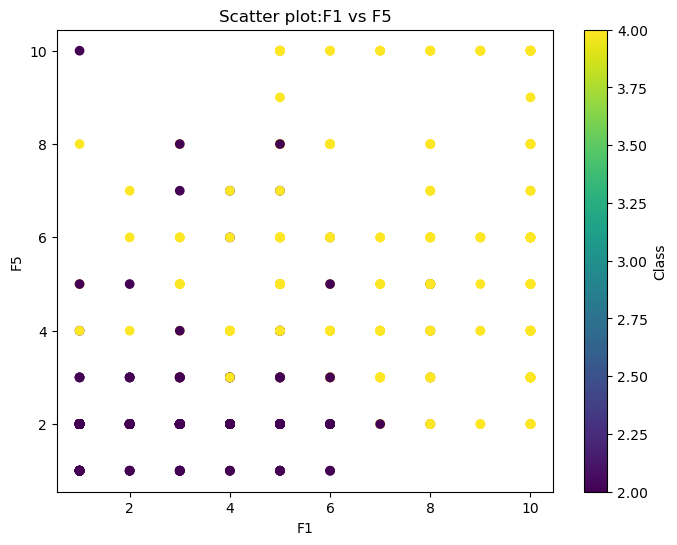

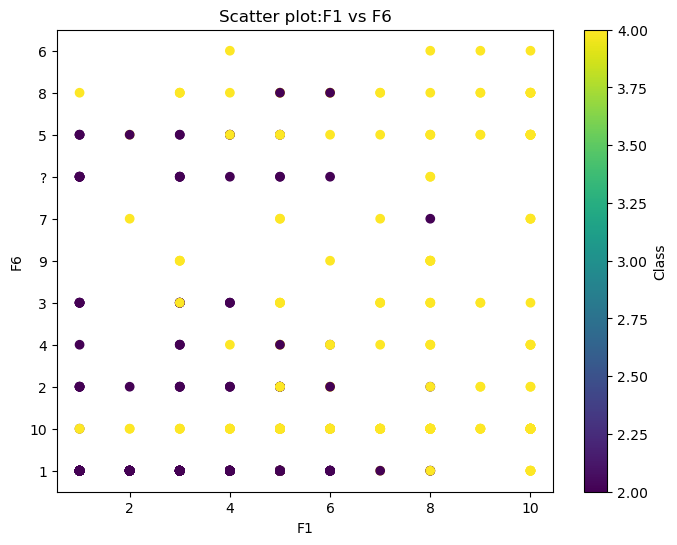

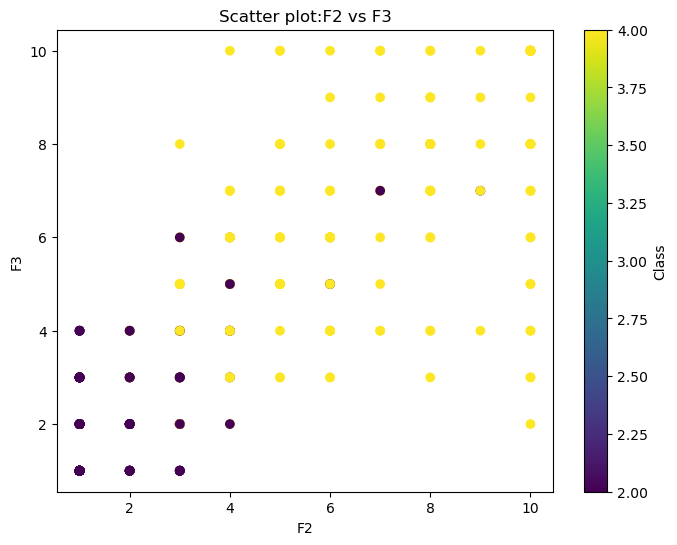

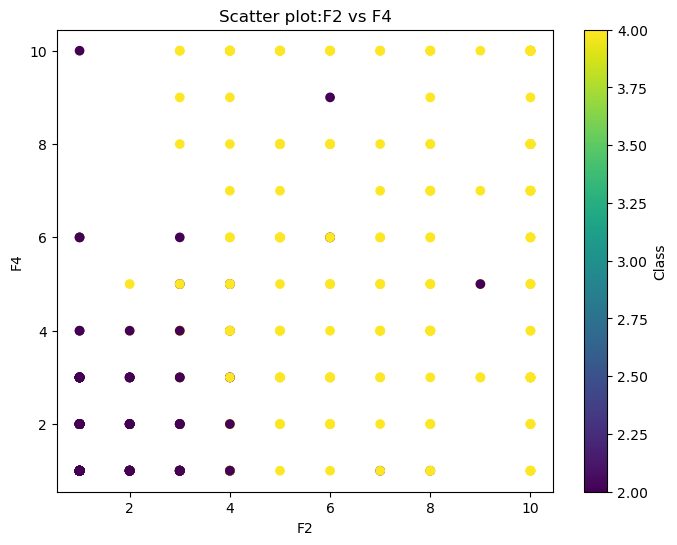

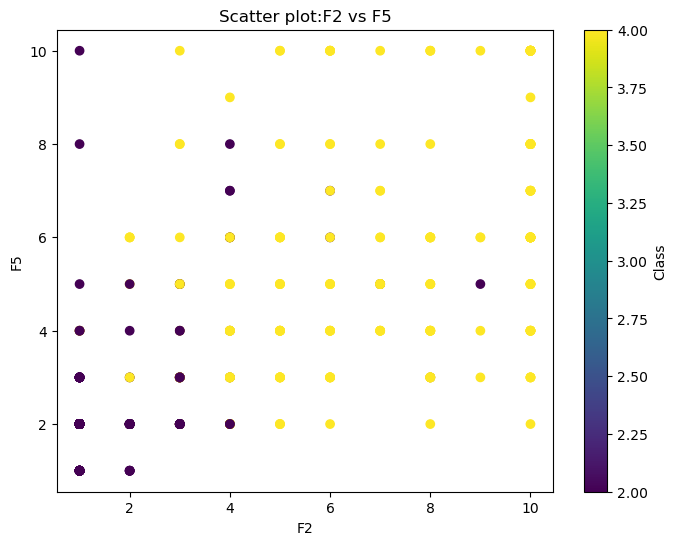

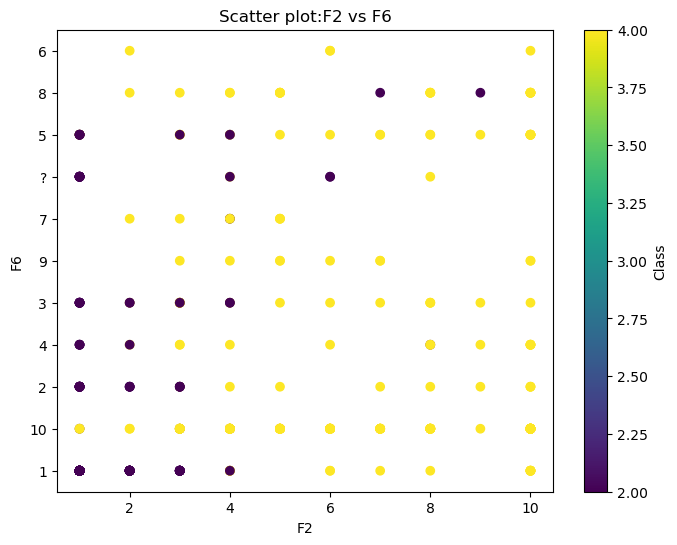

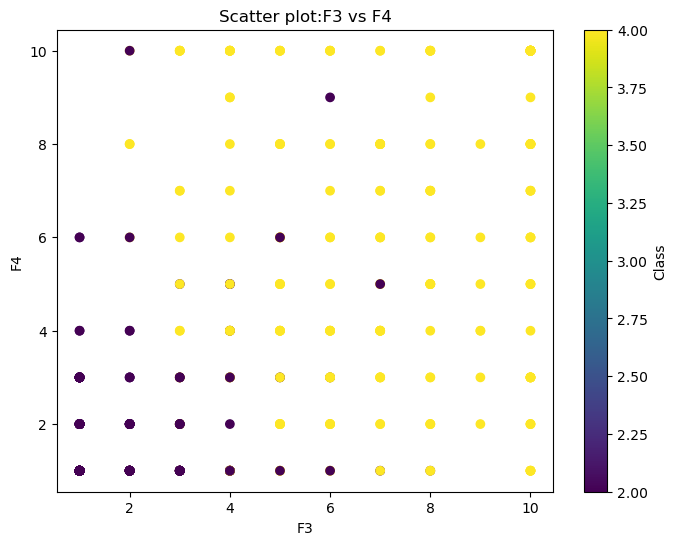

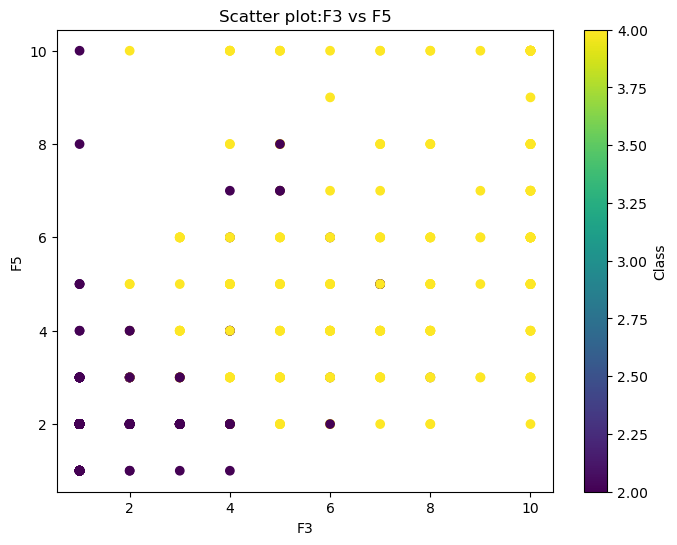

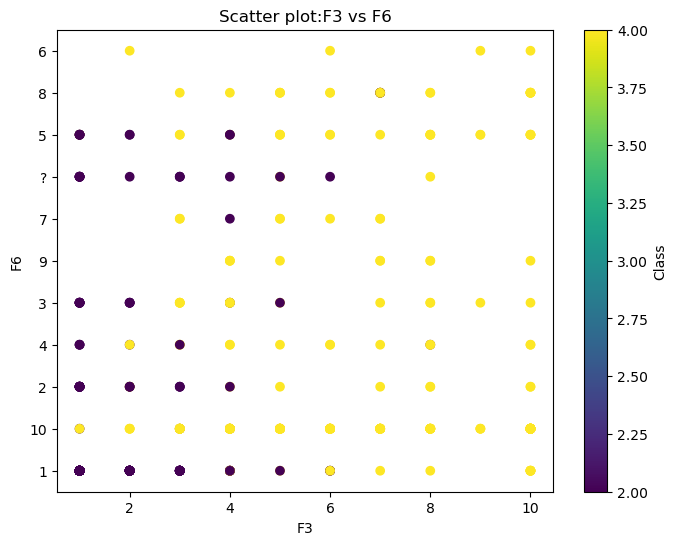

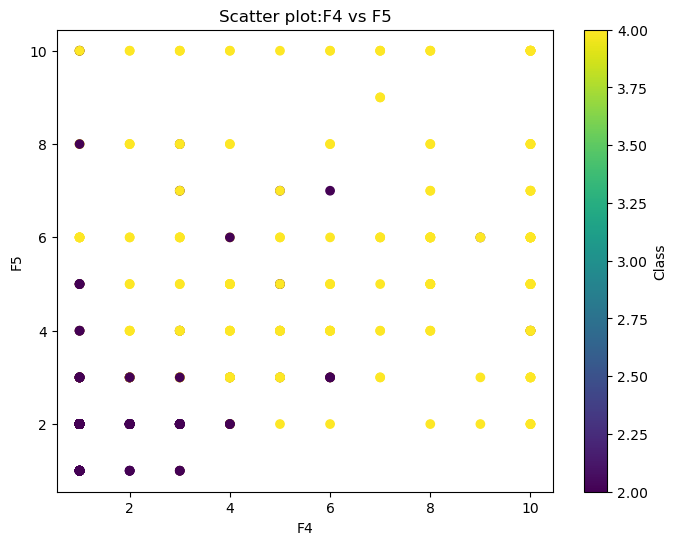

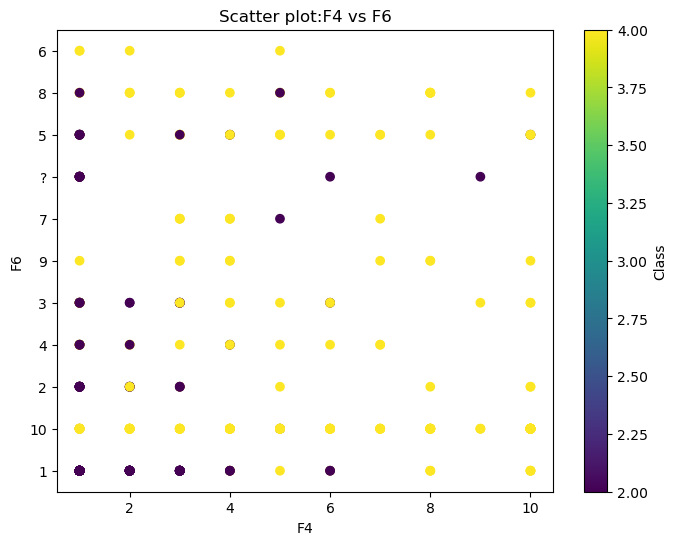

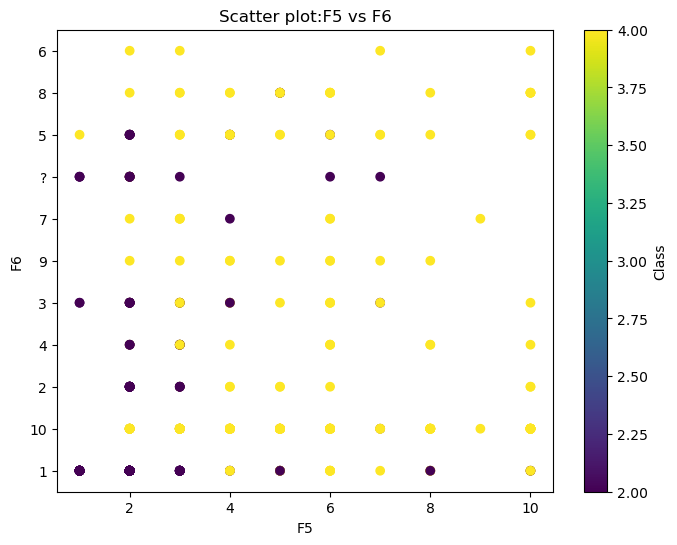

In [21]:
for i in range(len(columns_to_plot)):
    for j in range(i + 1, len(columns_to_plot)):
        plt.figure(figsize=(8,6))
        plt.scatter(data[columns_to_plot[i]], data[columns_to_plot[j]], c=data['Class'], cmap = 'viridis')
        plt.xlabel(columns_to_plot[i])
        plt.ylabel(columns_to_plot[j])
        plt.title(f"Scatter plot:{columns_to_plot[i]} vs {columns_to_plot[j]}")
        plt.colorbar(label='Class')
        plt.show()

# 6.Show histogram box plot for columns F7 to F9

In [22]:
columns_to_plot_2 = ['F7','F8','F9']

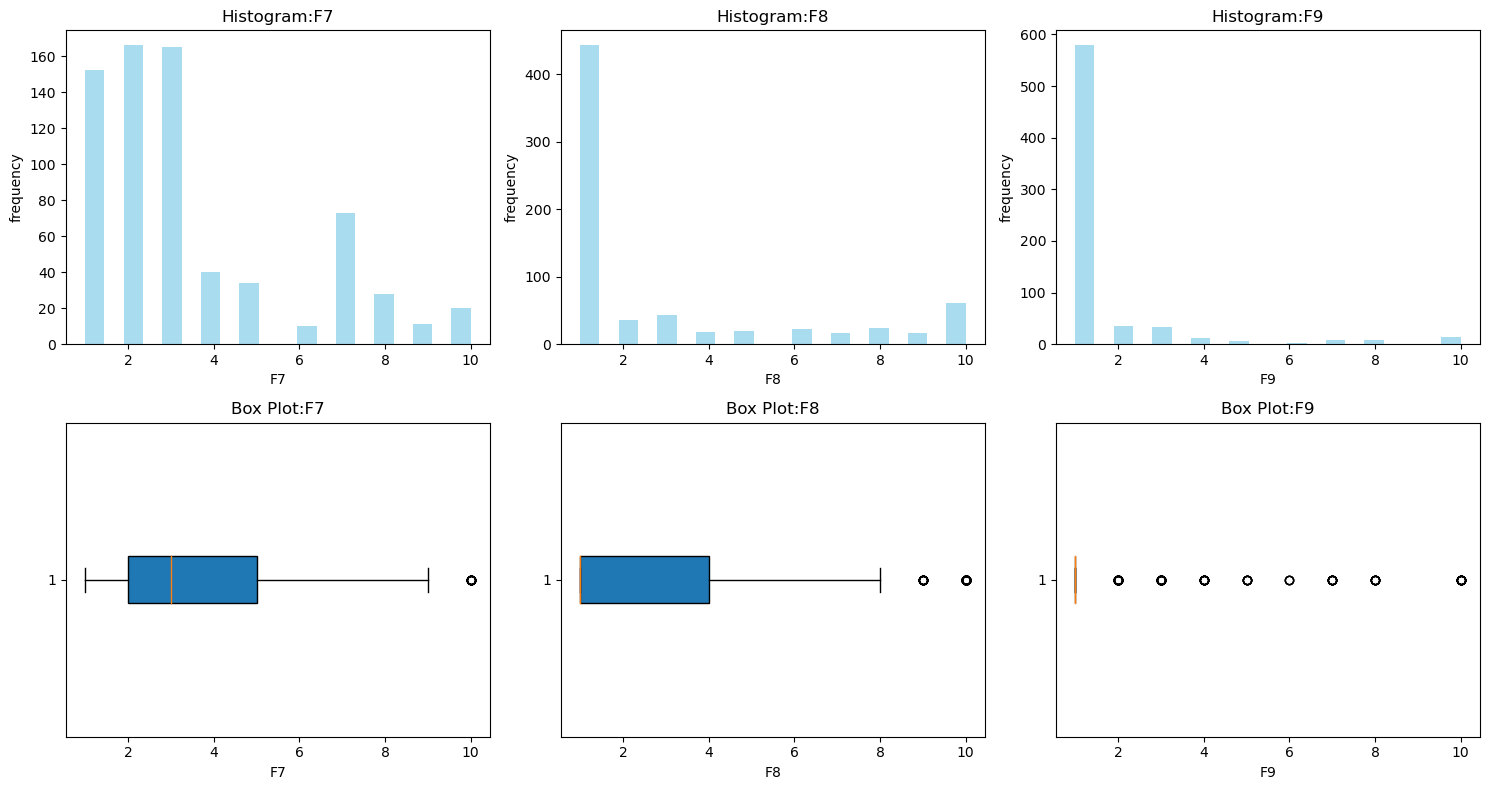

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=len(columns_to_plot_2),figsize=(15,8))

for i, column in enumerate(columns_to_plot_2):
    axes[0,i].hist(data[column], bins=20,color='skyblue',alpha=0.7)
    axes[0,i].set_xlabel(column)
    axes[0,i].set_ylabel('frequency')
    axes[0,i].set_title(f'Histogram:{column}')
    
for i, column in enumerate(columns_to_plot_2):
    axes[1,i].boxplot(data[column], vert = False, patch_artist = True)
    axes[1,i].set_xlabel(column)
    axes[1,i].set_title(f'Box Plot:{column}')   
    
plt.tight_layout()

plt.show()


    

# Import the necessary libraries for the models

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Create a function for evaluation that provides all relevant metrics after training a machine learning model.

In [25]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    
    return mae, rmse, r2_square

In [26]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso ": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}

model_list=[]
train_r2_list=[]
validation_r2_list=[]
test_r2_list=[]

for model_name, model in models.items():
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_validation_pred = model.predict(X_validation)
    y_test_pred = model.predict(X_test)
    
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_validation_mae , model_validation_rmse, model_validation_r2 = evaluate_model(y_validation, y_validation_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(model_name)
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    train_r2_list.append(model_train_r2)
    
    print('----------------------------------')
    
    print('Model performance for validation set')
    print("- Root Mean Squared Error: {:.4f}".format(model_validation_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_validation_mae))
    print("- R2 Score: {:.4f}".format(model_validation_r2))
    validation_r2_list.append(model_validation_r2)  
    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    test_r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3862
- Mean Absolute Error: 0.2563
- R2 Score: 0.8375
----------------------------------
Model performance for validation set
- Root Mean Squared Error: 0.4060
- Mean Absolute Error: 0.2799
- R2 Score: 0.7863
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3695
- Mean Absolute Error: 0.2464
- R2 Score: 0.8453


Lasso 
Model performance for Training set
- Root Mean Squared Error: 0.9582
- Mean Absolute Error: 0.9181
- R2 Score: 0.0000
----------------------------------
Model performance for validation set
- Root Mean Squared Error: 0.8990
- Mean Absolute Error: 0.8631
- R2 Score: -0.0478
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9411
- Mean Absolute Error: 0.9019
- R2 Score: -0.0036


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3863
- Mean Absolute Error: 0.2560
- R2 Score: 0.8375
-

# Seleceting Best Model based on the highest validation set R2 score

In [27]:
best_model_idx = np.argmax(validation_r2_list)
best_model_name = model_list[best_model_idx]

print("Best Model based on Validation Set R2 Score:")
print(f"{best_model_name}: R2 Score = {validation_r2_list[best_model_idx]:.4f}")

Best Model based on Validation Set R2 Score:
K-Neighbors Regressor: R2 Score = 0.8858


# Create a Bar plot for RR2 Score of different models

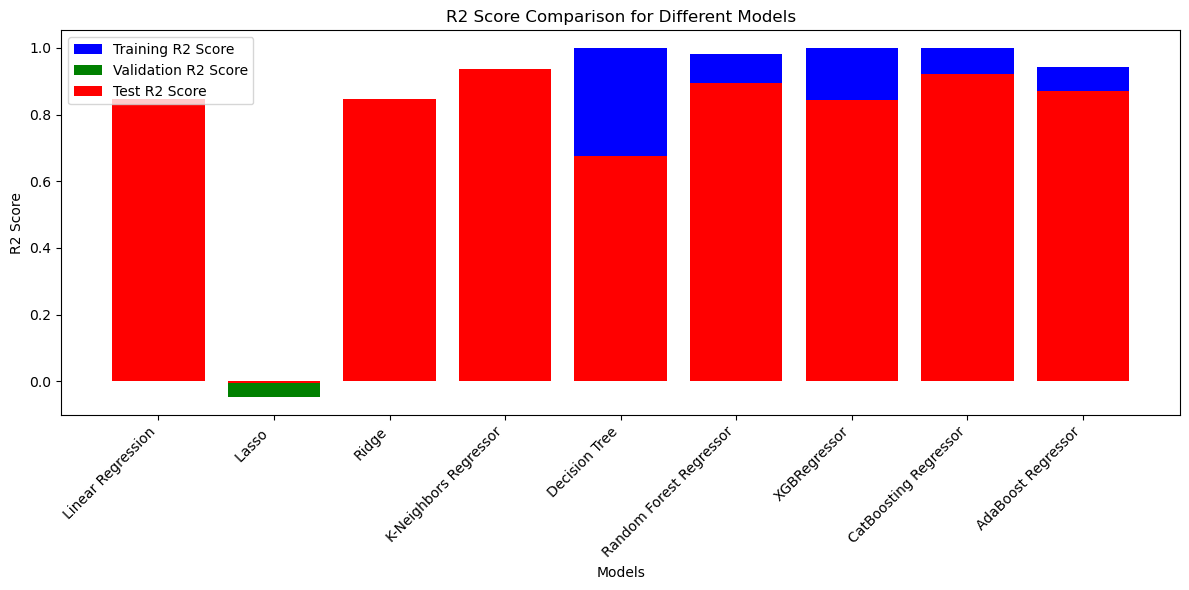

In [28]:

plt.figure(figsize=(12, 6))
plt.bar(model_list, train_r2_list, color='b', label='Training R2 Score')
plt.bar(model_list, validation_r2_list, color='g', label='Validation R2 Score')
plt.bar(model_list, test_r2_list, color='r', label='Test R2 Score')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison for Different Models')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
